# Clustering Yelp Restaurants

**Part 1: To be completed INDIVIDUALLY and due on March 3 at 2pm.**

In [1]:
print('Your fitst name + last name')
print("Monil Jhaveri")
print("BU ID U29685415")

Your fitst name + last name
Monil Jhaveri
BU ID U29685415


In this assignment, we will be working with the [Yelp dataset](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

From the Business Objects, let's try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You may want to use only a subset (15-20) of popular categories.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

In [89]:
import json 
import numpy as np 
import pandas as pd 
import itertools
import sklearn.metrics as metrics
import scipy.cluster.hierarchy as hr
import seaborn as sn
from scipy import linalg
#import antigravity 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform
from sklearn import mixture
%matplotlib inline

In [193]:
import json 
import numpy as np 
import pandas as pd 
#import antigravity 

count = 0 
def create_dict(data): 
    dict1 = {} 
    dict1["longitude"] = float(data["longitude"]) 
    dict1["latitude"] = float(data["latitude"])
    dict1["categories"] = data["categories"]
    dict1["categories"].remove("Restaurants")
    return dict1 
    
dataDict = {}
for row in open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"): 
    
    data = json.loads(row)
    if (data["city"] == "Las Vegas"):
        if "Restaurants" in data["categories"]:
            dataDict[data["business_id"]] = create_dict(data)
        count += 1
    #if (count == 1000):
     #   break 
df = pd.DataFrame(dataDict)
d = df.T
lat = np.asarray((d["longitude"].values))
long = np.asarray((d["latitude"].values))
#f = np.array([[1,2,3],[1,3,5],[2,4,5]])
coord = d.as_matrix(columns=['latitude', 'longitude'])

print(coord.shape)
if coord.dtype is np.dtype('O'):
    print("W")
#witCoord = whiten(coord, check_finite=False)
#print(type(long))
#type(f)
d

(4658, 2)
W


,categories,latitude,longitude
--jFTZmywe7StuZ2hEjxyA,"[Fast Food, Sandwiches]",36.1188,-115.182
--zgHBiQpr8H2ZqSdGmguQ,"[Buffets, Chinese]",36.1065,-115.172
-1B-DEGkLE1kDj5ENAF2NQ,[Ukrainian],36.1141,-115.241
-1ERbsOf9XOC9wGbZYFr7g,[Mexican],36.1595,-115.352
-2n-OHbbwIv3SY8RP9bgTQ,[Italian],36.1282,-115.173
-36CwMJZJigqPMYrx9BJzw,[American (Traditional)],36.1104,-115.207
-4mNZfAXMd2mxEsD2YRcaQ,"[Burgers, Fast Food]",36.1089,-115.173
-584fn2GxYe9sLsgN2WeQA,"[Burgers, Hot Dogs, Sandwiches]",36.2396,-115.226
-5RN56jH78MV2oquLV_G8g,"[Bars, Nightlife, French]",36.112,-115.177
-5biAn5qQYk3X5NYlA98pw,[Mexican],36.1437,-115.141


In [196]:
flatten = lambda l: [item for sublist in l for item in sublist]

def tfidf(df): 
    corpus = df["categories"].values
    corpus = corpus.reshape(-1,1)
    corpus = flatten(corpus)
    corpus = flatten(corpus)
    #print(corpus)
    vectorize = TfidfVectorizer(min_df=1)
    x = vectorize.fit_transform(corpus)
    idf = vectorize.idf_
    y = dict(zip(vectorize.get_feature_names(), idf))
    return(y)
tfdif = tfidf(d)

def kmodes_clustering(df, numClusters): 
    kp = kprototypes.KPrototypes(n_clusters=4, init="HuanCaog", verbose=2)
    numerical = df.as_matrix(columns=['latitude', 'longitude', 'categories'])
    corpus = flatten(df['categories'])
    #print(corpus)
    #clusters = kp.fit_predict(numerical,categorical=list(corpus))

In [197]:
def find_most_common_categories(df, num): 
    corpus = flatten(df["categories"])
    setc = set(corpus)
    maxN = []
    corpusCount = corpus.count
    print(corpusCount)
    for i in range(num): 
        d = max(setc, key=corpusCount)
        maxN.append(d)
        setc.remove(d)
    return maxN
mostCommon = find_most_common_categories(d, 25)

def make_new_df(df, mostCommon):
    row, column = df.shape
    ind = (df.index)
    column = len(mostCommon)
    zero_data = np.zeros(shape=(row, column), dtype=float)
    d = pd.DataFrame(zero_data, index = ind)
    d.columns = mostCommon
    #d["latitude"] = d["latitude"].astype(float)
    #d["longitude"] = d["longitude"].astype(float)

    df_new = pd.concat([df, d], axis=1)
    df_new.fillna(0, inplace=True)
    return df_new
def populate_df(df):
    vocab = df.columns.values
    vocab = vocab[3:]
    vocab = [i.lower() for i in vocab]
    ind = df.index 
    dfT = df.T 
    newInd = dfT.index
    #print(vocab)
    cvec = CountVectorizer(vocabulary = vocab)
    tarray = [] 
    busId = [] 
    lat = []
    long = [] 
    for row in open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"): 
        data = json.loads(row)

        if (data["city"] == "Las Vegas"):
            if "Restaurants" in data["categories"]:
                tmp = ""
                for item in data["categories"]:
                    if item.lower() in vocab: 
                        tmp = tmp + " " + item    
                tarray.append(tmp)
                busId.append(data["business_id"])
                lat.append(data["latitude"])
                long.append(data["longitude"])
    
    y = cvec.fit_transform(tarray).toarray()
    sl = np.asarray(lat)
    sl = preprocessing.scale(sl)
    nlong = np.asarray(long)
    nlong = preprocessing.scale(nlong)
    newDf = pd.DataFrame(data=y)
    newDf.columns = vocab
    newDf["latitude"] = sl
    newDf["longitude"] = nlong
    newDf.index = np.asarray(busId)
    return newDf
f = make_new_df(d, mostCommon)
f = populate_df(f)

f

<built-in method count of list object at 0x7fa647fc86c8>


,fast food,mexican,american (traditional),pizza,nightlife,sandwiches,bars,burgers,chinese,food,...,barbeque,cafes,asian fusion,chicken wings,thai,sports bars,delis,buffets,latitude,longitude
_SM8UKIwBNbmj1r629ipoQ,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.122579,-1.717944
l6QcUE8XXLrVH6Ydm4GSNw,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.189473,0.001839
AgtFQVxo-PGQVsOdY6Nvdg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.299651,1.283162
muqFM9Hoamh_fGL4MPeZqg,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-1.975738,1.124090
AFDFOs2GaIyUArGyEUDQzQ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.069209,-0.097709
FV16IeXJp2W6pnghTz2FAw,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,-0.064474,-0.037651
cvJDHk1ho0DxaF26etcr8Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.230528,-0.248012
10UcN8MF1kQiyTJAfHKvfQ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0.277373,0.059818
R5e2XWtpa_CA77MIXEyCTg,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.008722,-0.221366
CoJivG0wxNIBXyOF7MNqSQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.078490,-0.068333


In [198]:
def kmeans_clustering(coord, numofClusters, title): 
    err = np.zeros(numofClusters)
    for i in range(0, numofClusters): 
        kMeans = KMeans(init='k-means++', n_clusters = i + 1, n_init=10)
        kMeans.fit_predict(coord)
        err[i] = kMeans.inertia_
        print(err[i])
    kmLabels = kMeans.labels_
    #print(kmLabels)
    plt.figure(1)
    plt.plot(range(numofClusters), err)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Error")
    plt.title(title)
    plt.show()
    return kmLabels

In [199]:
type(d['latitude'])
type(d.as_matrix(['latitude']))
b = f.as_matrix(columns=['latitude', 'longitude'])


In [200]:
mostCommon = [i.lower() for i in mostCommon]

def most_vote(labelclusters, df, mostCommon): 
    df["clusters"] = np.asarray(labelclusters)
    npArray = np.empty((0,len(mostCommon)), dtype=np.int)
    clusters = []
    for  i in range(len(mostCommon)):
        clusters.append(i)
        d = df["clusters"] == i
        groupDf = df[d]
        g = groupDf[mostCommon].sum()
        s = np.asarray(g.values)
        s.reshape(1,len(mostCommon))
        npArray = np.append(npArray, s, 0)
    #print(npArray)
    cluster1 = pd.DataFrame(npArray[1:,:])
    print(cluster1)
        
    
def categories_clustering(df, tfdig, mostCommon, title): 
    #mostCommon.remove("fast food")
    for i in mostCommon: 
        a = i.split()[0]
        df.loc[:,i] *= tfdig[a]
    df = preprocessing.scale(df[mostCommon])
    #coord = df.as_matrix(mostCommon)
    #coord = preprocessing.scale(coord)
    s = kmeans_clustering(df, 30, title)
    return df 

79186.0
71265.2314625
66090.8388543
61570.2218308
56500.8722548
52105.4295039
47542.4546694
43249.641206
38745.8552893
34158.7543096
30084.6339301
25924.3357197
22746.6992534
19033.0306756
15911.175037
14056.9859115
11741.8626214
11000.3309399
10450.9737188
9776.28125057
9282.37098368
8690.86221532
8356.12637719
7945.16021513
7540.83411719
7142.76076239
7073.74235573
6718.39374397
6267.49510335
6189.09498955


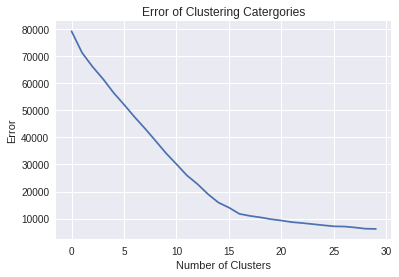

In [51]:
cat = categories_clustering(d, tfdif, mostCommon, "Error of Clustering Catergories")
#def kmeans_clustering(coord, numofClusters): 


In [201]:
def lat_long_clustering(df, tfdig, mostCommon, title): 
    #mostCommon.remove("fast food")
    for i in mostCommon: 
        a = i.split()[0]
        df.loc[:,i] *= tfdig[a]
    f = preprocessing.scale(df[mostCommon])
    coord = df.as_matrix(["latitude", "longitude"])
    coord = preprocessing.scale(coord)
    print(df.shape)
    print(coord.shape)
    #alldata = np.append(df, coord, 1)
    dataframe = pd.DataFrame(coord)
    s = kmeans_clustering(coord, 30, title)
    return dataframe

def lat_long_cat_clustering(df, tfdig, mostCommon, title): 
    #mostCommon.remove("fast food")
    for i in mostCommon: 
        a = i.split()[0]
        df.loc[:,i] *= tfdig[a]
    f = preprocessing.scale(df[mostCommon])
    coord = df.as_matrix(["latitude", "longitude"])
    coord = preprocessing.scale(coord)
    print(df.shape)
    print(coord.shape)
    alldata = np.append(df, coord, 1)
    #alldata = preprocessing.scale(alldata)
    dataframe = pd.DataFrame(alldata)
    s = kmeans_clustering(alldata, 30, title)
    return dataframe

def lat_long_whiten_clustering(df, tfdig, mostCommon, title): 
    #mostCommon.remove("fast food")
    
    for i in mostCommon: 
        a = i.split()[0]
        df.loc[:,i] *= tfdig[a]
    coord = df.as_matrix(["latitude", "longitude"])
    witCoord = whiten(coord, check_finite=False)

    dataframe = pd.DataFrame(witCoord)
    s = kmeans_clustering(witCoord, 30, title)
    return dataframe

(4658, 27)
(4658, 2)
9316.0
5449.70346003
4075.37800335
2977.15562979
2233.97395491
1859.84237492
1569.59297877
1355.21061835
1168.52701802
989.019685815
902.886888531
831.059402655
766.598887967
698.246548713
643.014851387
603.457191077
573.5682292
532.328719196
499.667338375
470.865061937
448.057557813
417.306148835
399.716374319
376.948933086
362.493444871
343.208642009
331.417807793
322.096300303
309.9417415
291.143345815


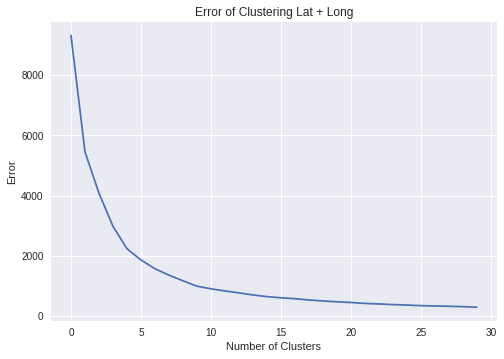

In [18]:
latlongC = lat_long_clustering(d, tfdif, mostCommon, "Error of Clustering Lat + Long")

(4658, 27)
(4658, 2)
108829.080723
95565.304728
88275.1319363
81428.2683955
77099.5140834
70703.7588508
64584.5245394
60903.4123184
57065.9145094
52684.5965565
50183.381024
46933.481606
45046.8065033
43519.4668328
41522.9756354
37630.8407139
37430.6493309
37170.7555693
32509.7286243
32592.3077741
30906.133462
29762.8672564
29396.7731546
28528.2370644
28197.8783212
27057.8920714
26765.5368923
26149.787588
25313.5790935
24900.2462353


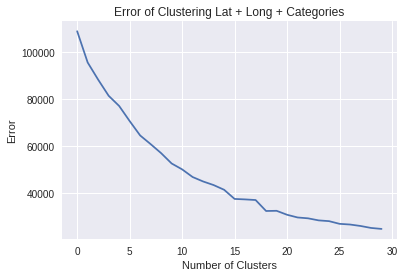

In [203]:
latlongcatC = lat_long_cat_clustering(f, tfdif, mostCommon, "Error of Clustering Lat + Long + Categories")

9316.0
5449.70346003
4077.70875025
2977.19075965
2233.88781585
1863.434993
1569.5950903
1359.58732791
1170.51625251
989.040360854
907.607865716
830.614394747
760.762395079
698.949141334
660.510677222
597.900616687
562.20858323
529.151575998
502.178592392
477.372938969
447.857842036
420.353080016
401.116468202
381.82370461
362.152590155
351.622331651
323.733219535
317.654328466
306.773812546
290.511698378


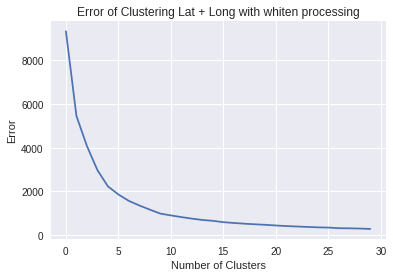

In [78]:
latlongwhitenC = lat_long_whiten_clustering(d, tfdif, mostCommon, "Error of Clustering Lat + Long with whiten processing")

In [21]:
mostCommon = [i.lower() for i in mostCommon]

vectTags = d.as_matrix(mostCommon)
print(vectTags[0])

kmeans_clustering(vectTags, len(mostCommon))

[    0.             0.             0.             0.          4380.80981958
     0.          1534.93959776     0.             0.             0.             0.
  8235.23119442     0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.             0.
     0.             0.        ]


TypeError: kmeans_clustering() missing 1 required positional argument: 'title'

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


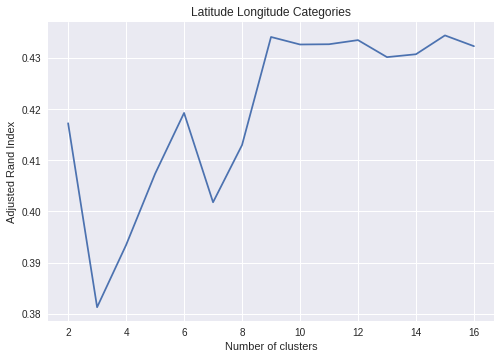

In [22]:
def sc_evaluate_clusters(X,max_clusters, title):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        print(k)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=300)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    plt.title(title)
    plt.show()
sc_evaluate_clusters(latlongcatC,16, "Latitude Longitude Categories")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


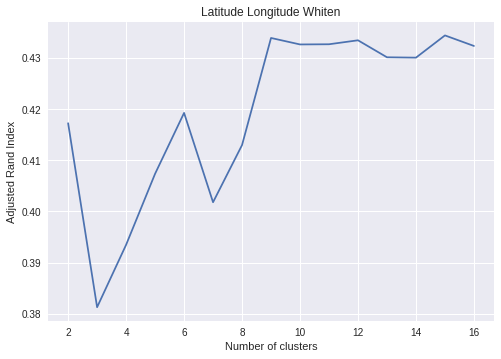

In [23]:
sc_evaluate_clusters(latlongwhitenC,16, "Latitude Longitude Whiten")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


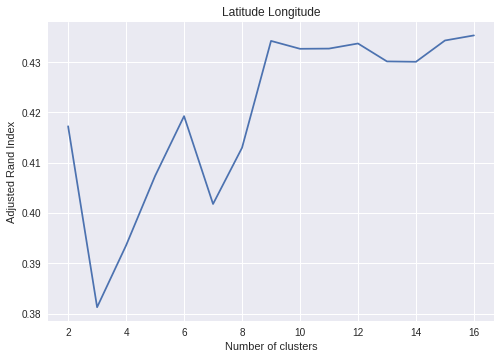

In [24]:
sc_evaluate_clusters(latlongC ,16, "Latitude Longitude")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


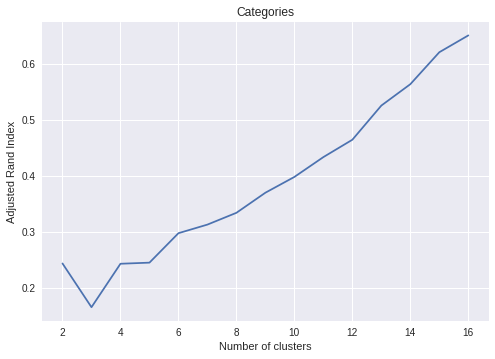

In [25]:
sc_evaluate_clusters(cat,16, "Categories")

d


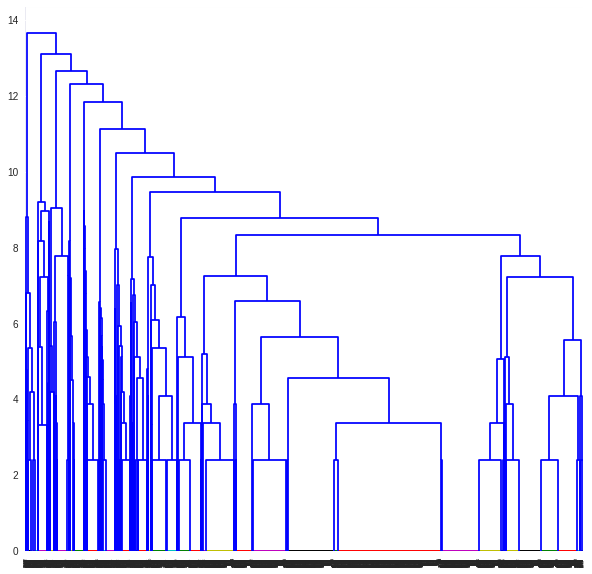

In [55]:
matrix = cat
#print(matrix)
z = hr.linkage(matrix, method='complete', metric='euclidean')
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(z,color_threshold=0.4, leaf_font_size=4)
#fig.show()
#dist = metrics.euclidean_distances(matrix)
#cg = sn.clustermap(dist, method="complete", figsize=(13,13), xticklabels=False)
print("d")
#hierichal_clustering(d, mostCommon)
#print cg.dendrogram_col.reordered_ind

In [56]:
#plt.show()

In [57]:
fig.show()

/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [80]:
matrix = latlongcatC.as_matrix()

/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anacon

[-1.71794373  0.00183871  1.28316169 ...,  0.78553735 -0.83397135
  0.41632066]


/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nextdroid/anaconda3/en

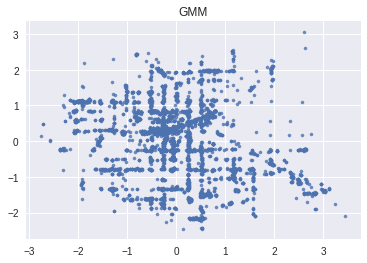

In [82]:
gmm = mixture.GMM(n_components=8, covariance_type='tied')

gmm.fit(matrix)

y_pred = gmm.predict(matrix)
print(matrix[:,1])
#colors = ['bg'[p] for p in y_pred]
plt.scatter(matrix[:, 0], matrix[:, 1],  s=10, alpha=0.8)
plt.title("GMM")

Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(10 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

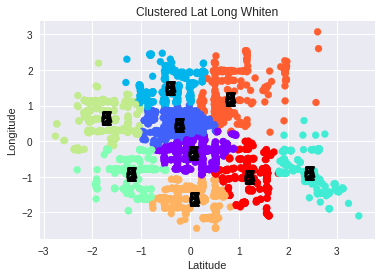

fast food
color
[ 0.5  0.   1.   1. ]
mexican
color
[ 0.24901961  0.38410575  0.98063477  1.        ]
american (traditional)
color
[ 0.00196078  0.70928131  0.92328911  1.        ]
pizza
color
[ 0.25294118  0.92563766  0.83018403  1.        ]
nightlife
color
[ 0.50392157  0.99998103  0.70492555  1.        ]
sandwiches
color
[ 0.75490196  0.92090552  0.55236497  1.        ]
bars
color
[ 1.          0.70054304  0.37841105  1.        ]
burgers
color
[ 1.          0.37270199  0.18980109  1.        ]
chinese
color
[  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]


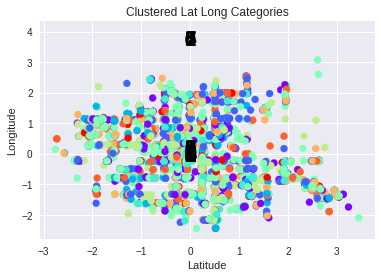

fast food
color
[ 0.5  0.   1.   1. ]
mexican
color
[ 0.24901961  0.38410575  0.98063477  1.        ]
american (traditional)
color
[ 0.00196078  0.70928131  0.92328911  1.        ]
pizza
color
[ 0.25294118  0.92563766  0.83018403  1.        ]
nightlife
color
[ 0.50392157  0.99998103  0.70492555  1.        ]
sandwiches
color
[ 0.75490196  0.92090552  0.55236497  1.        ]
bars
color
[ 1.          0.70054304  0.37841105  1.        ]
burgers
color
[ 1.          0.37270199  0.18980109  1.        ]
chinese
color
[  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]


,fast food,mexican,american (traditional),pizza,nightlife,sandwiches,bars,burgers,chinese,food,...,barbeque,cafes,asian fusion,chicken wings,thai,sports bars,delis,buffets,latitude,longitude
_SM8UKIwBNbmj1r629ipoQ,0.0,0.000000,0.0,0.000000,4.045067,0.000000,3.396372,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.122579,-1.717944
l6QcUE8XXLrVH6Ydm4GSNw,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.255703,0.000000,3.052578,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.189473,0.001839
AgtFQVxo-PGQVsOdY6Nvdg,0.0,0.000000,0.0,3.974398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-2.299651,1.283162
muqFM9Hoamh_fGL4MPeZqg,0.0,0.000000,0.0,0.000000,4.045067,0.000000,3.396372,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-1.975738,1.124090
AFDFOs2GaIyUArGyEUDQzQ,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.278562,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.069209,-0.097709
FV16IeXJp2W6pnghTz2FAw,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.278562,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.064474,-0.037651
cvJDHk1ho0DxaF26etcr8Q,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.230528,-0.248012
10UcN8MF1kQiyTJAfHKvfQ,0.0,0.000000,0.0,0.000000,0.000000,4.047358,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,5.500028,0.0,0.277373,0.059818
R5e2XWtpa_CA77MIXEyCTg,0.0,0.000000,0.0,0.000000,0.000000,4.047358,0.000000,0.000000,0.000000,3.052578,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.008722,-0.221366
CoJivG0wxNIBXyOF7MNqSQ,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.078490,-0.068333


In [204]:
#latlongwhitenC
def kmeans_clustering_plotted(latlong ,coord, numofClusters, title, mostCommon): 
    err = np.zeros(numofClusters)
    kMeans = KMeans(init='k-means++', n_clusters = numofClusters + 1, n_init=10)
    kMeans.fit_predict(coord)
    kMeans.inertia_
    kmLabels = kMeans.labels_
    colors = cm.rainbow(np.linspace(0, 1, numofClusters+1))
    #for i in kmLabels:
     #   print(i)
    centers = kMeans.cluster_centers_ 
    plt.figure(1)
    
    plt.scatter(latlong["latitude"],latlong["longitude"], c = colors[kmLabels])
    for i in range(9):
        plt.scatter(centers[:,0], centers[:,1], marker='$%s$' % i, c='black',  alpha=1, s=200)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title(title)
    plt.show()
    for i in range(9):
        print(mostCommon[i])
        print("color")
        print(colors[i])

def kmeans_clustering_outliers(df ,coord, numofClusters, title, mostCommon): 
    err = np.zeros(numofClusters)
    kMeans = KMeans(init='k-means++', n_clusters = numofClusters, n_init=10)
    kMeans.fit_predict(coord)
    kMeans.inertia_
    kmLabels = kMeans.labels_
    centers = kMeans.cluster_centers_ 
    centers = kMeans.cluster_centers_ 
    df["labels"] = np.asarray(kmLabels)
    df

kmeans_clustering_plotted(f, latlongwhitenC.as_matrix(), 8, "Clustered Lat Long Whiten", mostCommon)
kmeans_clustering_plotted(f, latlongcatC.as_matrix(), 8, "Clustered Lat Long Categories", mostCommon)
f

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

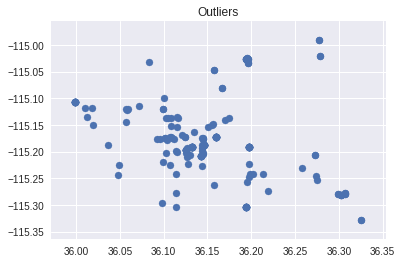

Wine Bars


,categories,latitude,longitude,labels
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
M2SjLXsuAy5RNKwxaA5E1g,"[Arts & Entertainment, Music Venues, Hotels, E...",36.0929,-115.176,5
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
eLPld7Q17XxlclFGzZQX5g,[Sushi Bars],36.1155,-115.135,0
cvJDHk1ho0DxaF26etcr8Q,"[Latin American, Colombian]",36.1429,-115.208,4
JxhSLFM7l0l2FYZs1ezf4A,"[Seafood, Fast Food, Chinese]",36.0832,-115.032,0
zjQxaHZSb47p7l-b7Nhzgg,"[Food, Desserts, Fast Food, Ice Cream & Frozen...",36.0482,-115.244,7


In [270]:
ind = f.index
latlongcatC.index = ind
def kmeans_clustering_outliers(df ,coord, numofClusters, mostCommon, f): 
    err = np.zeros(numofClusters)
    kMeans = KMeans(init='k-means++', n_clusters = numofClusters, n_init=10)
    kMeans.fit_predict(coord)
    kMeans.inertia_
    kmLabels = kMeans.labels_
    centers = kMeans.cluster_centers_ 
    df["labels"] = np.asarray(kmLabels)
    outlierDict = {}        
    
    s = [i for i in range(29)]
    colors = cm.rainbow(np.linspace(0, 1, numofClusters+1))
    index = 0 
    columnName = f.columns.values 
    maxIndex = [] 
    for i in range(8):
        d = (df["labels"] == i)
        g=df[d].subtract(centers[i])
        maxD = g.idxmax()
        maxIndex.append(maxD)
    maxIndex = flatten(maxIndex)
    data = np.empty((0,len(columnName)))
    #for i in maxIndex: 
    d = f.ix[maxIndex, columnName]
    plt.scatter(d["latitude"], d["longitude"])
    plt.title("Outliers")
    plt.show()
    maxCat = max(flatten(d["categories"]))
    print(maxCat)
    
        #d = d.as_matrix()
        #data.append(d, 0)
    return d
s = kmeans_clustering_outliers(latlongcatC,latlongcatC.as_matrix(), 8 ,mostCommon, d)
s


The outliers seem mostly to be wine bars more than anything else. And when the outliers are plotted on a latitude longitude plot they are further away from the center of the city. The fact that wine bars are outliers make sense. Las Vegas is known as place to party not going to wine tastings so it would make the most scense for the wine bars to be away from the commerical district. 

Give a detailed analysis comparing the results you obtained from the 3 techniques. **(10 pts)**

The primary thing I was trying to find with my analysis was the most common food districts. I tried a few different ways to analyze the data. The first thing I tried was to cluster the categories and the coordinate values seperately. This yielded a result that seemed to give two different clusters amounts, 15 and 6. Then I clustered all the data together and used whitenning and scaling to center the data. These tests seemed to indicate that there were 8 clusters. I then found the 25 most common tags and used those tags as the the labels for the clusters. For outliers I found the maximum manhattan distance between the centroids and the data points. This gave me an outlier for every vector that in every cluster. I I was then able to graph this and find the which was the most commonly occuring tag. For the clustering part of this homework I found that there were no main business districts. This is because it is las vegas and every casino in the city has 15 different types of food. This means that the data is not easy seperable. 


----------